Junction Art has the ability to create intersection in two ways.
 - By using <b>JunctionBuilderFromPointsAndHeading</b>
 - By using <b>SequentialJunctionBuilder</b> 

In this notebook we will see how to generate intersection using <b>SequentialJunctionBuilder</b>. This process adds random roads sequentially and creates the intersection. This random roads are incident to the intersection. Before starting to create intersections using <b>SequentialJunctionBuilder</b>, lets set some directory variables. Depending on the directory settings this will be different for different users. In order to visualize the generated intersection we also need a module from esmini.
 - The <b>projectFolder</b> is where we have the <b>JunctionArt</b> project.  
 - The <b>esminipath</b> is where we have the <b>esmini</b> project. 

In [1]:
projectFolder = 'C:/Users/abjaw/Documents/GitHub/junction-art' # add the correct directory name where you downloaded the junction art project
esminipath = 'C:/Users/abjaw/Documents/GitHub/esmini' # add the correct directory name where you downloaded the esmini

Next lets put the folder directory to system path so that we dont get any import errors. 

In [2]:
import os, sys
currentFolder = os.path.abspath('')
try:
    sys.path.remove(str(currentFolder))
except ValueError: # Already removed
    pass
sys.path.append(str(projectFolder))
os.chdir(projectFolder)
print( f"current working dir{os.getcwd()}")

current working dirC:\Users\abjaw\Documents\GitHub\junction-art


Lets import the necessary modules for creating the intersection using <b>SequentialJunctionBuilder</b>. 

In [7]:
import numpy as np
from junctionart.junctions.LaneConfigurationStrategies import LaneConfigurationStrategies
from junctionart.junctions.SequentialJunctionBuilder import SequentialJunctionBuilder
import junctionart.extensions as extensions
import pyodrx

Create the <b>intersectionBuilder</b> object for <b>SequentialJunctionBuilder</b>. <b>SequentialJunctionBuilder</b> takes in various paramters for randomizing the intersection generation process. We describe them below:
 - minAngle = minimum possible angle between incident roads 
 - maxAngle = maximum possible angle between incident roads
 - straightRoadLen = length of the straight incident roads 
 - probLongConnection = probability to create a long connection road (connection roads are roads inside the intersection)
 - probMinAngle = probability of having roads with minimum angle
 - probRestrictedLane =  
 - maxConnectionLength = 
 - minConnectionLength = 
 - random_seed =

In [5]:
intersectionBuilder = SequentialJunctionBuilder(minAngle=np.pi/10, 
                                         maxAngle=np.pi * .75, 
                                         straightRoadLen=10, 
                                         probLongConnection=0.1, 
                                         probMinAngle=0.1, 
                                         probRestrictedLane=0.2, 
                                         maxConnectionLength=50, 
                                         minConnectionLength=20, 
                                         random_seed=2)

C:/Users/abjaw/Documents/GitHub/esmini\bin\odrplot C:/Users/abjaw/Documents/GitHub/esmini/bin/pythonroad.xodr


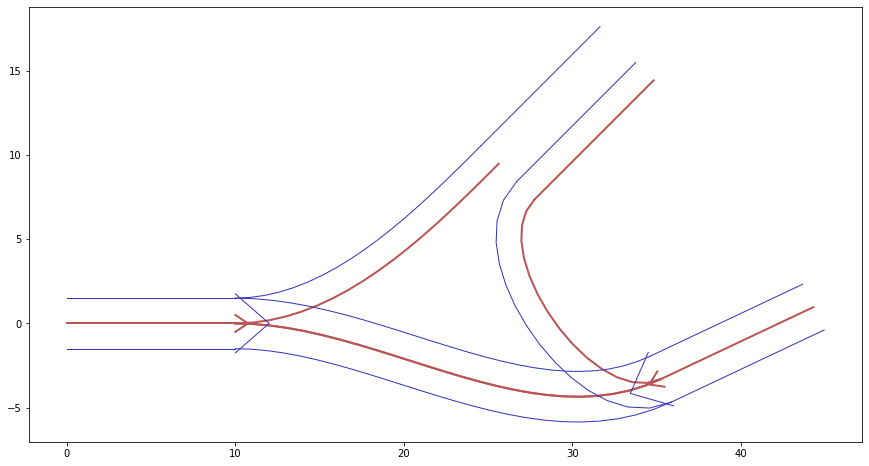

In [12]:
maxNumberOfRoadsPerJunction = 3
odr = intersectionBuilder.createWithRandomLaneConfigurations(straightRoadsPath=' ',  
                            id=0, 
                            maxNumberOfRoadsPerJunction=maxNumberOfRoadsPerJunction, 
                            maxLanePerSide=2, minLanePerSide=0, 
                            internalConnections=True, 
                            cp1=pyodrx.ContactPoint.end,
                            internalLinkStrategy = LaneConfigurationStrategies.SPLIT_FIRST)

# xmlPath = f"output/test_createWithRandomLaneConfigurations-split-first-{maxNumberOfRoadsPerJunction}.xodr"
# odr.write_xml(xmlPath)

extensions.view_road(odr,esminipath)